## SMOOTHING AND BLURRING
- Low-pass filter to reduce the amount of noise and detail in an image.
- Helpful when performing image processing tasks. In fact, smoothing and blurring
    is one of the most common pre-processing steps in computer vision and image
    processing.
- Smaller details in the image are smoothed out and we are left with more of the
    structural aspects of the image.
- By smoothing an image prior to applying techniques such as edge detection or
    thresholding, we are able to reduce the amount of high frequency content,
    such as noise and edges (i.e. the “detail” of an image).

In [1]:
import cv2
from cv_imshow import display_image

In [2]:
args= {
    "image" : "../images/florida_trip.png"
}

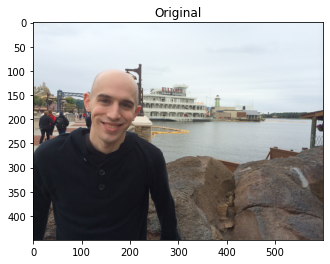

In [3]:
image = cv2.imread(args["image"])
display_image("Original", image)

### Averaging: 
- Takes an area of pixels surrounding a central pixel, averages all
    these pixels together, and replaces the central pixel with the average.

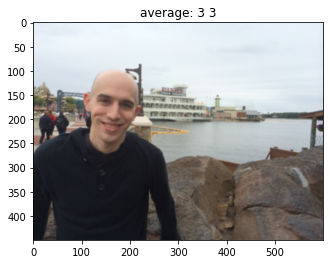

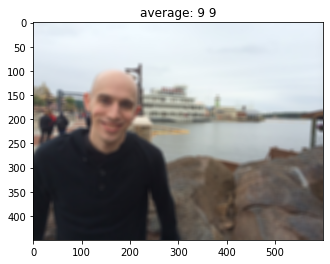

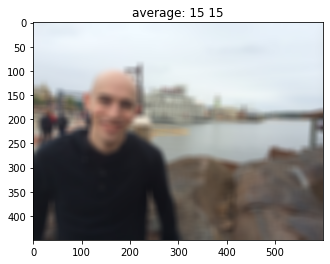

In [4]:
kernelSizes = [(3,3), (9,9), (15,15)]

for (kx,ky) in kernelSizes:
    blurred = cv2.blur(image, (kx,ky))
    display_image("average: {} {}".format(kx,ky), blurred)

### Gaussian: 
- Gaussian blurring is similar to average blurring, but instead of 
    using a simple mean, we are now using a weighted mean, where neighborhood 
    pixels that are closer to the central pixel contribute more “weight” to
    the average.
- The last parameter is our \sigma, the standard deviation of the Gaussian 
    distribution. By setting this value to 0, we are instructing OpenCV to 
    automatically compute \sigma based on our kernel size.

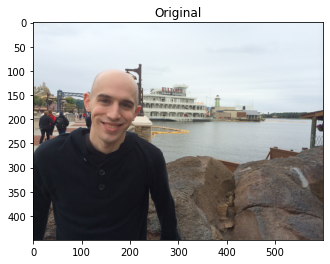

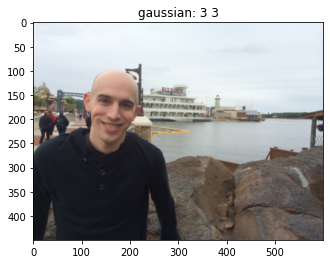

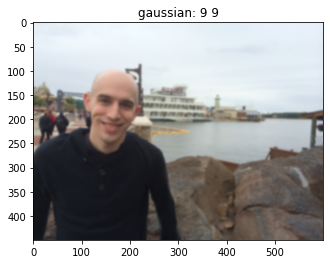

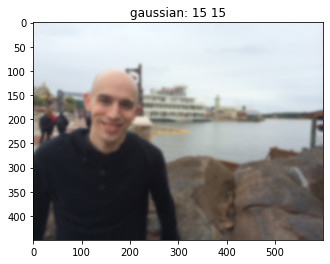

In [5]:
display_image("Original", image)

for (kx,ky) in kernelSizes:
    blurred = cv2.GaussianBlur(image, (kx,ky), 0)
    display_image("gaussian: {} {}".format(kx,ky), blurred)

### Median: 
- Most effective when removing salt-and-pepper noise. Instead of
    replacing the central pixel with the average of the neighborhood, we instead
    replace the central pixel with the median of the neighborhood.

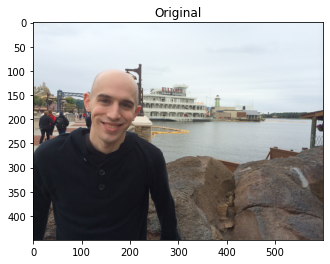

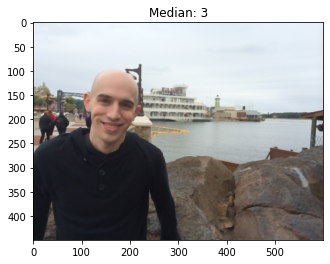

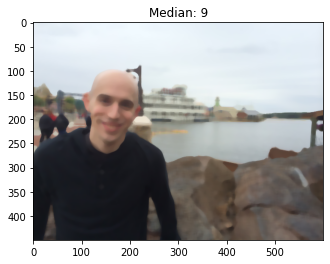

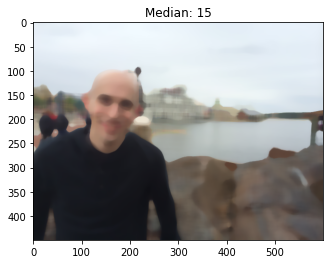

In [6]:
display_image("Original", image)

for k in (3,9,15):
    blurred = cv2.medianBlur(image, k)
    display_image("Median: {}".format(k), blurred)

### Bilateral Filtering: 
- In order to reduce noise while still maintaining edges,
    we can use bilateral blurring. Bilateral blurring accomplishes this by
    introducing two Gaussian distributions.
- The first Gaussian function only considers spatial neighbors. That is, pixels
    that appear close together in the (x, y)-coordinate space of the image. The
    second Gaussian then models the pixel intensity of the neighborhood, ensuring
    that only pixels with similar intensity are included in the actual computation of the blur.
- Intuitively, this makes sense. If pixels in the same (small) neighborhood have
    a similar pixel value, then they likely represent the same object. But if two 
    pixels in the same neighborhood have contrasting values, then we could be 
    examining the edge or boundary of an object — and we would like to preserve this edge.
- sigmaColor - More weight to neighboorhood pixels with intensities close to
    intensity of center pixel.
- sigmaSpace - More weight to close pixels. 

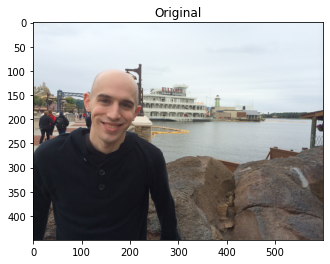

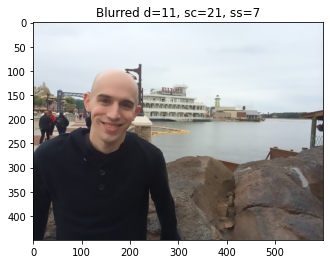

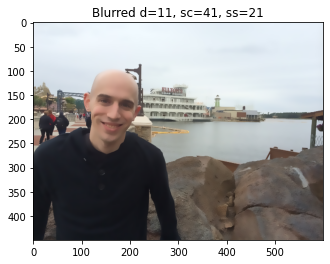

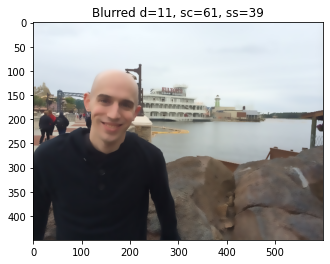

In [7]:
display_image("Original", image)
params = [(11,21,7), (11, 41, 21), (11,61, 39)]

for (diameter, sigmaColor, sigmaSpace) in params:
    blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
    title = "Blurred d={}, sc={}, ss={}".format(diameter, sigmaColor, sigmaSpace)
    display_image(title, blurred)
    